# SMS Spam/Ham Classification Test
- Data Download Link: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
- Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.
- In case you find this corpus useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.
- Send us a message to tiago@dt.fee.unicamp.br in case you make use of the corpus (TODO!)

## Feature Extraction

### Data Input

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read in the data and do a quick check
df = pd.read_csv("Data/sms_corpus/SMSSpamCollection.csv", header=None, names=["label", "text"], encoding="latin-1", quotechar='"')
df.dropna(inplace=True) #Drop any rows with missing data
df.head()

,label,text
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...


In [25]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4658   4351                               Sorry Ill call later   27
spam    726    616  Camera  You are awarded a SiPix Digital Camera...    4

### Pre-processing
- Remove links 
- Remove numbers
- Remove symbols/punctuation
- Remove Stopwords
- Stemming/Lematization

Ideas for pre-processing taken from: https://ijisrt.com/assets/upload/files/IJISRT21SEP728.pdf and https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained

In [2]:
#Remove links from text
df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)

#Remove numbers from text
df['text'] = df['text'].str.replace('\d+', '')

#Remove symbols/punctuation from text except space
df['text'] = df['text'].str.replace('[^\w\s]', '')

#Remove stopwords
'''
To Download Stopwords:
    import nltk
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')


# Stopwords are commonly used words in English which have no contextual meaning in an sentence.
# i.e "I like reading, so I read" --> "Like, Reading, read"
# '''
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# #Stemming
# '''
# Stemming usually refers to a process that chops off the ends of words in the hope of achieving goal correctly most of the time and often includes the removal of derivational affixes.

# i.e adjustable --> adjust
# i.e formalities --> formal
# '''
# from nltk.stem import PorterStemmer
# st = PorterStemmer()
# df['text'] = df['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

# #Lemmatization
# '''
# Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base and dictionary form of a word

# i.e was --> (to) be
# i.e better --> good
# '''
# from textblob import Word
# df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

#Show Data
df.head()

C:\Users\Sean\AppData\Local\Temp\ipykernel_20944\2438820532.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)
C:\Users\Sean\AppData\Local\Temp\ipykernel_20944\2438820532.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '')
C:\Users\Sean\AppData\Local\Temp\ipykernel_20944\2438820532.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]', '')


,label,text
0,ham,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry wkly comp win FA Cup final tkts st ...
3,ham,U dun say early hor U c already say
4,ham,Nah I dont think goes usf lives around though


### Vectorisation and Splitting of Data for evaluation
TF-IDF (term frequency–inverse document frequency):
- Numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus
- Value increases proportionally to the number of times a word appears in the document
- Offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general

Ideas taken from: https://ijisrt.com/assets/upload/files/IJISRT21SEP728.pdf and https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained

In [3]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,label,text
823,spam,SMSSERVICES yourinclusive text credits pls got...
1525,ham,Hicts employee
1805,ham,The bus leaves ltgt
2496,spam,WINNER As valued network customer hvae selecte...
1655,ham,Wishing family Merry X mas HAPPY NEW Year advance


In [4]:
#Count Vectorise text
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(encoding='latin-1')
X = cv.fit_transform(df['text']).toarray()

#Show count of words
vocab = cv.vocabulary_
print("Number of words in vocabulary: ", len(vocab))

#Show top 10 vocabulary
{k: vocab[k] for k in list(vocab)[:10]}

Number of words in vocabulary:  8433


{'smsservices': 6587,
 'yourinclusive': 8364,
 'text': 7206,
 'credits': 1550,
 'pls': 5407,
 'goto': 2890,
 'login': 4088,
 'qxj': 5753,
 'unsubscribe': 7689,
 'stop': 6865}

In [5]:
#Show X matrix with words as columns (For Visualisation)
disp = pd.DataFrame(X, columns=cv.get_feature_names())
disp[disp.columns[5455:5470]].head()

c:\Users\Sean\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,polyp,polyph,polyphonic,polys,polytruepixringtonesgames,pongal,pongaldo,ponnungale,poo,pookie,pool,poop,poor,poorly,poortiyagi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Transform labels to binary for y
y = np.where(df['label']=='spam', 1, 0)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2022)

In [7]:
print("Note, shape is (rows, columns)")
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

Note, shape is (rows, columns)
X_train shape:  (3230, 8433)
X_test shape:  (2154, 8433)
y_train shape:  (3230,)
y_test shape:  (2154,)


## Imports (For Models)

In [17]:
import matplotlib.pyplot as plt
#from qbstyles import mpl_style
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time

def plotDescent(descent):
    iterations = descent.keys()
    current_cost = descent.values()
    plt.plot(iterations, current_cost)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost reduction over time')

    #Save Graph
    plt.savefig('Graphs/SMS_Descent_'+str(time.time())+'.svg', format='svg', dpi=1200)
    plt.savefig('Graphs/SMS_Descent_'+str(time.time())+'.eps', format='eps', dpi=1200)
    plt.savefig('Graphs/SMS_Descent_'+str(time.time())+'.pdf', format='pdf', dpi=1200)

    #show graph
    plt.show()

def plotMultipleDescent(descentDict):
    for key, value in descentDict.items():
        iterations = value.keys()
        current_cost = value.values()
        plt.plot(iterations, current_cost, label=key)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost reduction over time')
    plt.legend()

    #Save Graph
    plt.savefig('Graphs/SMS_MultipleDescent_'+str(time.time())+'.svg', format='svg', dpi=1200)
    plt.savefig('Graphs/SMS_MultipleDescent_'+str(time.time())+'.eps', format='eps', dpi=1200)
    plt.savefig('Graphs/SMS_MultipleDescent_'+str(time.time())+'.pdf', format='pdf', dpi=1200)

    plt.show()

def plotMultipleValidationCurve(accuracyDict):
    lamda = accuracyDict.keys()
    accuracy = accuracyDict.values()
    plt.plot(lamda, accuracy)
    plt.xlabel('Alpha')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Alpha')
   
    #show graph
    plt.savefig('Graphs/SMS_MultipleValidationCurve_'+str(time.time())+'.svg', format='svg', dpi=1200, bbox_inches='tight')
    plt.savefig('Graphs/SMS_MultipleValidationCurve_'+str(time.time())+'.eps', format='eps', dpi=1200, bbox_inches='tight')
    plt.savefig('Graphs/SMS_MultipleValidationCurve_'+str(time.time())+'.pdf', format='pdf', dpi=1200, bbox_inches='tight')
    plt.show()
    

''' 
Confusion Matrix:
    - Evaluate the quality of the output of a classifier
    - diagonal elements represent the number of points for which the predicted label is equal to the true label
    - off-diagonal elements are those that are mislabeled by the classifier
    - The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
'''
def printConfusionMatrix(confusionMatrix):
    print("True Negatives: ", confusionMatrix[0][0])
    print("False Positives: ", confusionMatrix[0][1])
    print("False Negatives: ", confusionMatrix[1][0])
    print("True Positives: ", confusionMatrix[1][1])

def plotConfusionMatrix(y, y_predicted):
    titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", "true"),]
    for title, normalize in titles_options:
        disp = metrics.ConfusionMatrixDisplay.from_predictions(y, y_predicted, normalize=normalize)
        disp.ax_.set_title(title)
        #Save Graph
        plt.savefig('Graphs/SMS_'+title+'_'+str(time.time())+'.svg', format='svg', dpi=1200)
        plt.savefig('Graphs/SMS_'+title+'_'+str(time.time())+'.eps', format='eps', dpi=1200)
        plt.savefig('Graphs/SMS_'+title+'_'+str(time.time())+'.pdf', format='pdf', dpi=1200)

        plt.show()
        printConfusionMatrix(disp.confusion_matrix)
    
'''
Precision Recall Curve:
    - shows the tradeoff between precision and recall for different threshold
    - high area under the curve represents both high recall and high precision
    - high precision relates to a low false positive rate, and high recall relates to a low false negative rate

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
'''
def plotPrecisionRecall(y, y_predicted):
    disp = metrics.PrecisionRecallDisplay.from_predictions(y, y_predicted)

    #Save Graph
    plt.savefig('Graphs/SMS_PrecisionRecall_'+str(time.time())+'.svg', format='svg', dpi=1200)
    plt.savefig('Graphs/SMS_PrecisionRecall_'+str(time.time())+'.eps', format='eps', dpi=1200)
    plt.savefig('Graphs/SMS_PrecisionRecall_'+str(time.time())+'.pdf', format='pdf', dpi=1200)

    plt.show()

'''
ROC Curve:
    - ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis
    -  “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.
    
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
'''
def plotROC(y, y_predicted):
    metrics.RocCurveDisplay.from_predictions(y, y_predicted)
    plt.plot([0, 1], [0, 1], linestyle='--')   

    #Save Graph
    plt.savefig('Graphs/SMS_ROC_'+str(time.time())+'.svg', format='svg', dpi=1200)
    plt.savefig('Graphs/SMS_ROC_'+str(time.time())+'.eps', format='eps', dpi=1200)
    plt.savefig('Graphs/SMS_ROC_'+str(time.time())+'.pdf', format='pdf', dpi=1200)

    plt.show()

def printMetrics(y, y_predicted):
    print(f'Accuracy: {metrics.accuracy_score(y, y_predicted)}') #best possible score is 1.0
    print(f'MAE: {metrics.mean_absolute_error(y, y_predicted)}') #the lower the better, 0.0 is perfect
    print(f'Precision: {metrics.precision_score(y, y_predicted)}') #the higher the better, 1.0 is perfect
    print(f'Recall: {metrics.recall_score(y, y_predicted)}') #the higher the better, 1.0 is perfect
    print(f'F1: {metrics.f1_score(y, y_predicted)}')

def plotMetrics(y, y_predicted):
    print('Confusion Matrix')
    plotConfusionMatrix(y, y_predicted)
    print('----------------------------------------------------------------------------------------------------------------')
    print('Precision Recall Curve')
    plotPrecisionRecall(y, y_predicted)
    print('----------------------------------------------------------------------------------------------------------------')
    print('ROC Curve')
    plotROC(y, y_predicted)

In [14]:
import numpy as np

class LogisticRegression:
    def fit(self, X, y, alpha=0.001, iterations=100000, calcCost=False):
        # weights initialization
        self.weights = np.zeros(X.shape[1])
        self.beta = 0
        self.descent = dict()
        epsilon = 1e-12

        prevWights = np.inf
        prevBeta = np.inf
        
        for i in range(iterations):
            #calculate new weights and beta
            z = np.dot(X, self.weights) + self.beta
            f_wb = 1 / (1 + np.exp(-z)) #sigmoid function

            #calculate gradients
            '''
            - X.T is the transpose of X (out features). 
            - Here, transpose is used to change the shape of X from (Sample, Features) to (Features, Sample) so that we can multiply it with the error vector.
            - f_wb - y is the difference between the predicted and actual values
            - Dot product is used to mulyiply the two matrices (reference explanation)

            - w.r.t to explanation, y.size is m (number of samples)
            - Summation of gradient for the jth feature is the same as the dot product of the jth column of X and the error vector
            - We are batch updating the weights, so we are using the entire dataset to calculate the gradient
            '''
            gradient = np.dot(X.T, (f_wb - y)) / y.size

            #calculate weights and beta
            self.weights -= alpha * gradient
            '''
            - Beta is calculated similar to the gradient, except we do not multiply it by X (i.e its transpore)
            - Sum is used here to sum up all the values in the error vector since there is only 1 beta value
            '''
            self.beta -= alpha * (np.sum(f_wb - y) / y.size)
      
            if (calcCost):                       
                if i % 100 == 0:
                    z = np.dot(X,self.weights) + self.beta
                    f_wb = 1 / (1 + np.exp(-z)) #sigmoid function
                    cost = (-y * np.log(f_wb + epsilon) - (1 - y) * np.log(1 - f_wb + epsilon)).mean()
                    self.descent[i] = cost
                    print(f'cost: {cost} \t', f'weights: {self.weights} \t', f'beta: {self.beta}')
            
            #Early Dropout
            if ((abs(self.weights - prevWights) < epsilon).all() and (abs(self.beta - prevBeta) < epsilon)):
                print('Early dropout at iteration: ', i)
                print('Weights: ', self.weights)
                print('Beta: ', self.beta)
                break

            prevWights = self.weights
            prevBeta = self.beta
            
        return self.weights, self.beta, self.descent
            
    def predict(self, X):
        z = np.dot(X, self.weights) + self.beta
        f_wb = 1 / (1 + np.exp(-z)) #sigmoid function
        return f_wb.round() #round to 0 or 1 (binary classification)
    
    def alphaFinder(self,learningRates, X, y, iterations=100000):
        descentDict = dict()
        for alpha in learningRates:
            weights, beta, descent = LogisticRegression().fit(X, y, alpha, iterations, calcCost=True)
            descentDict[alpha] = descent
        return descentDict

In [26]:
class NaiveBayes:
    def fit(self,X,y, alpha=1.0):
        #number of samples
        sampleCount = X.shape[0]

        #group samples by class label
        separated = [[x for x, t in zip(X, y) if t == c] for c in np.unique(y)]

        #calculate prior probability for each class, i.e P(y) = N_y/N_total
        self.classLogPrior = [np.log(len(i) / sampleCount) for i in separated] 

        #calculate P(x_i|y) with smoothing (we default to laplace smoothing, alpha = 1)
        #first calculate frequency
        count = np.array([np.array(i).sum(axis=0) for i in separated]) + alpha 
        #then calculate log probability 
        #[np.newaxis].T is simpy to transpore the array to allow for broadcasting.
        self.featureLogProb = np.log(count / count.sum(axis=1)[np.newaxis].T) 
        
        return self.classLogPrior, self.featureLogProb
    
    def predict(self,X):
        #calculate P(x|y)P(y)
        combinedLikelihood = [(self.featureLogProb * x).sum(axis=1) + self.classLogPrior for x in X]
        #return the class with the highest probability
        return np.argmax(combinedLikelihood, axis=1)

    def alphaFinder(self,alphaArr, X, y):
        f1Dict = dict()
        #split x y into 80% training and 20% testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        for alpha in alphaArr:
            NB = NaiveBayes()
            NB.fit(X_train, y_train, alpha)
            y_predicted = NB.predict(X_test)
            f1Dict[alpha] = metrics.accuracy_score(y_test, y_predicted)
        return f1Dict

In [165]:
class ModifiedLogisticRegression:
    '''
        Let us consider a case where we would like to apply SGD without "sacrificing exposure to feature"
        1) SGD with a batch size of 1 to reduce time complexity from Matrix-Vector multiplication to Vector-Vector multiplication
        2) Adjust Learning Rate depending on exposure of features. 
            - If a feature is exposed more often, we reduce the learning rate to reduce the impact of the feature
            - If a feature is exposed less often, we increase the learning rate to increase the impact of the feature
            
            Note: this is implenented by storing a dictionary of the number of times a feature is exposed
        3) DO not randomise, instead choosing to initialise initial set of weights as a batch gradient descent but once.


        This decreases from O(nFS) to O(nF) 
    '''
    def fit(self, X, y, alpha=1, iterations=100000, calcCost=False):
        # weights initialization
        self.weights = np.zeros(X.shape[1])
        self.beta = 0

        #Perform batch gradient descent ONCE
        z = np.dot(X, self.weights) + self.beta
        f_wb = 1 / (1 + np.exp(-z)) #sigmoid function
        gradient = np.dot(X.T, (f_wb - y)) / y.size
        self.weights -= alpha * gradient
        self.beta -= alpha * np.sum(f_wb - y) / y.size

        self.descent = dict()
        epsilon = 1e-12

        prevWights = np.inf
        prevBeta = np.inf

        #initialise dictionary to store number of times a feature is exposed
        featureExposure = dict()
        for i in range(X.shape[1]):
            featureExposure[i] = 0
        
        for i in range(iterations):
            # First we randomly select a sample
            sampleIndex = np.random.randint(0, X.shape[0])
            x = X[sampleIndex]
            y_actual = y[sampleIndex]

            #Make prediction
            z = np.dot(x, self.weights) + self.beta #note, here x is a vector.
            f_wb = 1 / (1 + np.exp(-z)) #sigmoid function     

            #calculate gradient for 1 sample
            #Note, we basically get rid of summation (the np.dot) since we are only using 1 sample
            #Note, we also get rid of the 1/m constant (the 1/y.size) since we are only using 1 sample
            #https://stats.stackexchange.com/questions/232056/how-could-stochastic-gradient-descent-save-time-compared-to-standard-gradient-de/232058#232058
            gradient = (f_wb - y_actual) * x

            #Update weights with reference to the number of times a feature is exposed
            for j in range(X.shape[1]):
                if x[j] != 0:
                    featureExposure[j] += 1
                    self.weights[j] -= alpha * (1 / featureExposure[j]) * gradient[j]
            
            #Update beta for 1 sample
            #Note, we basically get rid of summation (the np.dot) since we are only using 1 sample
            #Note, we also get rid of the 1/m constant (the 1/y.size) since we are only using 1 sample
            self.beta -= alpha * (f_wb - y_actual)

            if (calcCost):                        
                if i % 5 == 0:
                    #calculate cost of new weight
                    z = np.dot(X,self.weights) + self.beta
                    f_wb = 1 / (1 + np.exp(-z)) #sigmoid function
                    cost = (-y * np.log(f_wb + epsilon) - (1 - y) * np.log(1 - f_wb + epsilon)).mean()
                    self.descent[i] = cost
                    # print(f'cost: {cost} \t', f'weights: {self.weights} \t', f'beta: {self.beta}')

            #Early Dropout
            if ((abs(self.weights - prevWights) < epsilon).all() and (abs(self.beta - prevBeta) < epsilon)):
                print('Early dropout at iteration: ', i)
                print('Weights: ', self.weights)
                print('Beta: ', self.beta)
                break

            prevWights = self.weights
            prevBeta = self.beta
            
        return self.weights, self.beta, self.descent
            
    def predict(self, X):
        z = np.dot(X, self.weights) + self.beta
        f_wb = 1 / (1 + np.exp(-z)) #sigmoid function
        return f_wb.round() #round to 0 or 1 (binary classification)

## Train Models

#### Logistic Regression:

```
Training time: 1119.4008977413177s

Prediction time: 0.053299665451049805s

Accuracy: 0.978644382544104
MAE: 0.02135561745589601
Precision: 0.9691119691119691
Recall: 0.8685121107266436
F1: 0.9160583941605839

True Negatives:  1857
False Positives:  8
False Negatives:  38
True Positives:  251

True Negatives:  0.995710455764075
False Positives:  0.004289544235924933
False Negatives:  0.1314878892733564
True Positives:  0.8685121107266436
```

In [16]:
#Logistic Regression Model
# Find Optimal LR
import time
start = time.time()
learningRates = [0.0001, 0.001, 0.01, 0.1, 1]
LR_tuner = LogisticRegression()
descentDict = LR_tuner.alphaFinder(learningRates, X_train, y_train, iterations=3001)
end = time.time()
print(f'Time taken: {end-start} seconds')


cost: 0.6931327050536145 	 weights: [-1.54798762e-08 -1.54798762e-08 -3.09597523e-08 ...  0.00000000e+00
 -1.00619195e-06 -3.09597523e-08] 	 beta: -3.5510835913312694e-05
cost: 0.6916889923620535 	 weights: [-1.56187700e-06 -1.56189877e-06 -3.12396560e-06 ...  0.00000000e+00
 -1.01517499e-04 -3.12394927e-06] 	 beta: -0.003581699905259113
cost: 0.6902528504816546 	 weights: [-3.10513033e-06 -3.10521695e-06 -6.21110216e-06 ...  0.00000000e+00
 -2.01815556e-04 -6.21103716e-06] 	 beta: -0.0071182152779656095
cost: 0.68882423674926 	 weights: [-4.64524837e-06 -4.64544282e-06 -9.29238537e-06 ...  0.00000000e+00
 -3.01900940e-04 -9.29223938e-06] 	 beta: -0.010645084452536355
cost: 0.6874031086859455 	 weights: [-6.18223959e-06 -6.18258484e-06 -1.23678312e-05 ...  0.00000000e+00
 -4.01774231e-04 -1.23675719e-05] 	 beta: -0.014162334922300275
cost: 0.6859894239974382 	 weights: [-7.71611251e-06 -7.71665142e-06 -1.54374555e-05 ...  0.00000000e+00
 -5.01436008e-04 -1.54370506e-05] 	 beta: -0.0176

NameError: name 'plotMultipleDescent' is not defined

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


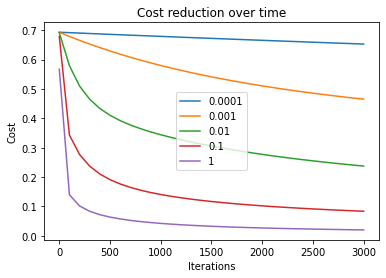

In [18]:

#Plot Cost vs Iterations
plotMultipleDescent(descentDict)


In [19]:
#print descent dict for 0, 1000, 2000, 3000 iterations
for alpha in learningRates:
    print(f'Learning Rate: {alpha}')
    print(f'Cost at 0 iterations: {descentDict[alpha][0]}')
    print(f'Cost at 1000 iterations: {descentDict[alpha][1000]}')
    print(f'Cost at 2000 iterations: {descentDict[alpha][2000]}')
    print(f'Cost at 3000 iterations: {descentDict[alpha][3000]}')

Learning Rate: 0.0001
Cost at 0 iterations: 0.6931327050536145
Cost at 1000 iterations: 0.6790311838502877
Cost at 2000 iterations: 0.6656491674585793
Cost at 3000 iterations: 0.6529465086092799
Learning Rate: 0.001
Cost at 0 iterations: 0.6930024426458151
Cost at 1000 iterations: 0.5799790816653592
Cost at 2000 iterations: 0.5105344798389788
Cost at 3000 iterations: 0.4652869822529769
Learning Rate: 0.01
Cost at 0 iterations: 0.6917015145533176
Cost at 1000 iterations: 0.34416173267100875
Cost at 2000 iterations: 0.27737765904551265
Cost at 3000 iterations: 0.23754303398708634
Learning Rate: 0.1
Cost at 0 iterations: 0.6788618196063357
Cost at 1000 iterations: 0.14071080116106593
Cost at 2000 iterations: 0.10212886096477239
Cost at 3000 iterations: 0.08372352869733257
Learning Rate: 1
Cost at 0 iterations: 0.567299182962325
Cost at 1000 iterations: 0.04238720203423772
Cost at 2000 iterations: 0.026860403883423874
Cost at 3000 iterations: 0.02019232471351627


cost: 0.5606584388827326 	 weights: [-0.0003096 -0.0001548 -0.0004644 ... -0.0001548 -0.0119195 -0.0001548] 	 beta: -0.36470588235294116
cost: 0.135821208376869 	 weights: [-0.00536383 -0.00278076 -0.01034655 ... -0.0028193  -0.20539656
 -0.00308189] 	 beta: -2.580294799241553
cost: 0.09971805484398984 	 weights: [-0.00697303 -0.00368149 -0.01474267 ... -0.00380005 -0.27634275
 -0.00415862] 	 beta: -2.9623513268597685
cost: 0.08251916997077201 	 weights: [-0.00794657 -0.00427468 -0.01802651 ... -0.00448152 -0.32393802
 -0.00488684] 	 beta: -3.1760102307082887
cost: 0.07159563294997377 	 weights: [-0.00862643 -0.00472447 -0.02078038 ... -0.00502326 -0.36015303
 -0.00545596] 	 beta: -3.3229538353112997
cost: 0.06374053928073052 	 weights: [-0.00913629 -0.00508816 -0.02321347 ... -0.0054804  -0.38943769
 -0.00593158] 	 beta: -3.43568496364584
cost: 0.057695256334613663 	 weights: [-0.00953584 -0.00539324 -0.02542593 ... -0.00587892 -0.41399627
 -0.00634432] 	 beta: -3.5281126475536824
cos

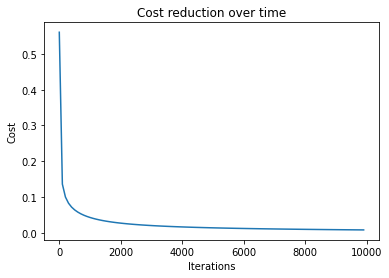

In [159]:
startTime = time.time()
LR = LogisticRegression()
weights, beta, descent = LR.fit(X_train, y_train, alpha=1, iterations=10000, calcCost=True)
print(f'Training time: {time.time() - startTime}s')


#Note, assuming calcCost, matrix-vector multiplication performed. time complexity of O(nFS)
plotDescent(descent)

In [160]:
startTime = time.time()
LR = LogisticRegression()
LR.fit(X_train, y_train, alpha=1, iterations=10000, calcCost=False)
print(f'Training time: {time.time() - startTime}')

#Note, matrix-vector multiplication still performed with Batch Grad Descent. time complexity of O(nFS)

Training time: 1119.4008977413177


Prediction time: 0.053299665451049805s

Accuracy: 0.978644382544104
MAE: 0.02135561745589601
Precision: 0.9691119691119691
Recall: 0.8685121107266436
F1: 0.9160583941605839
Confusion Matrix


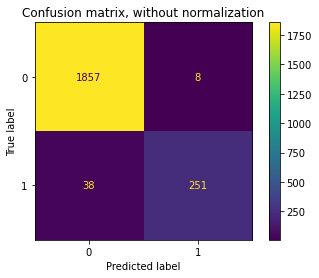

True Negatives:  1857
False Positives:  8
False Negatives:  38
True Positives:  251


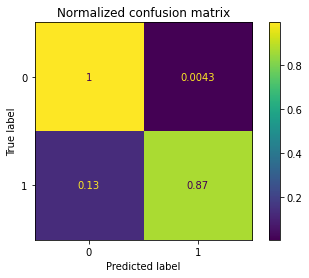

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


True Negatives:  0.995710455764075
False Positives:  0.004289544235924933
False Negatives:  0.1314878892733564
True Positives:  0.8685121107266436
----------------------------------------------------------------------------------------------------------------
Precision Recall Curve


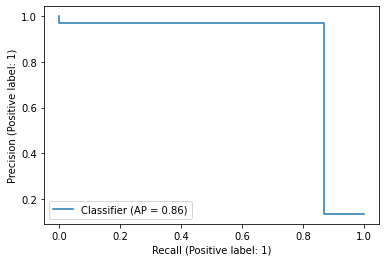

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------------------------------------------------------------------------------------
ROC Curve


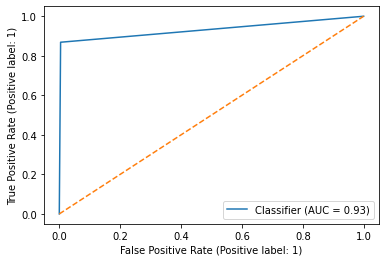

In [161]:
startTime = time.time()
LRpreds = LR.predict(X_test)
endTime = time.time()
print(f'Prediction time: {endTime - startTime}s\n')
printMetrics(y_test, LRpreds)
plotMetrics(y_test, LRpreds)

#Note, here only matrix-vector multiplication performed. time complexity of O(nF)

#### Modified Logistic Regression


Notable Differences from a typical SGD Implementation:
1) Weights and Beta are not randomised, instead derived from performing batch gradient descent once
   1) Allows for all features to have been seen at least once, without the chance of any not being seen before
2) No adaptive learning rate. (Most SGDs make use of a learning rate decaying/decreasing at an approximated rate)
   1) Wrt to Literature, this should allow it to better converge at the global minima

    INSTEAD:
    - We choose to adjust learning rate based on the exposure to a word, believing that the more common a word is seen, the less importance it should have in updating weights. 
    - The less often a word is seen, the more importance it should have in updating weights

```
Training time: 17.007474660873413s

Prediction time: 0.04787254333496094s

Accuracy: 0.9805013927576601
MAE: 0.019498607242339833
Precision: 0.9768339768339769
Recall: 0.8754325259515571
F1: 0.9233576642335767

True Negatives:  1859
False Positives:  6
False Negatives:  36
True Positives:  253

True Negatives:  0.9967828418230563
False Positives:  0.0032171581769436996
False Negatives:  0.1245674740484429
True Positives:  0.8754325259515571
```

Training time: 131.59664368629456s


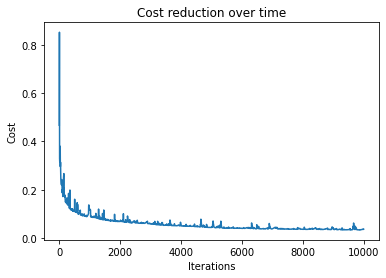

In [166]:
startTime = time.time()
MLR = ModifiedLogisticRegression()
modifiedWeights, modifiedBeta, modifiedDescent = MLR.fit(X_train, y_train, alpha=1, iterations=10000, calcCost=True, seed=10092022)
print(f'Training time: {time.time() - startTime}s')

#Note, matrix-vector multiplication performed. time complexity of O(nFS)
plotDescent(modifiedDescent)

In [167]:
startTime = time.time()
MLR = ModifiedLogisticRegression()
modifiedWeights, modifiedBeta, modifiedDescent = MLR.fit(X_train, y_train, alpha=1, iterations=10000, calcCost=False, seed=10092022)
print(f'Training time: {time.time() - startTime}s')

Training time: 17.007474660873413s


Prediction time: 0.04787254333496094s

Accuracy: 0.9805013927576601
MAE: 0.019498607242339833
Precision: 0.9768339768339769
Recall: 0.8754325259515571
F1: 0.9233576642335767
Confusion Matrix


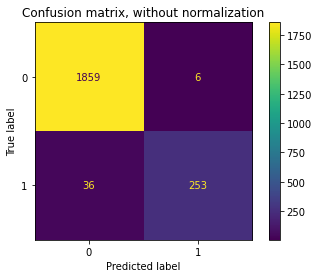

True Negatives:  1859
False Positives:  6
False Negatives:  36
True Positives:  253


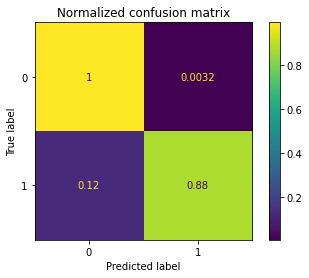

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


True Negatives:  0.9967828418230563
False Positives:  0.0032171581769436996
False Negatives:  0.1245674740484429
True Positives:  0.8754325259515571
----------------------------------------------------------------------------------------------------------------
Precision Recall Curve


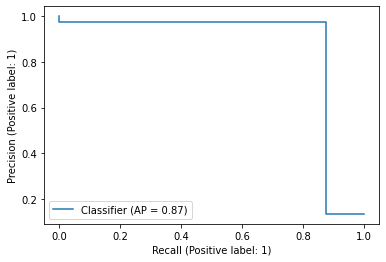

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------------------------------------------------------------------------------------
ROC Curve


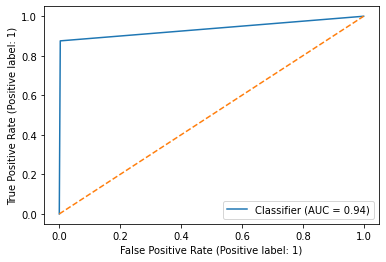

In [168]:
startTime = time.time()
MLRpreds = MLR.predict(X_test)
endTime = time.time()
print(f'Prediction time: {endTime - startTime}s\n')
printMetrics(y_test, MLRpreds)
plotMetrics(y_test, MLRpreds)

#Note, here only matrix-vector multiplication performed. time complexity of O(nF)

#### Naive Bayes
```
{0.0001: 0.9705882352941176,
 0.001: 0.9674922600619195,
 0.01: 0.9705882352941176,
 0.1: 0.9690402476780186,
 1: 0.9798761609907121}

Training time: 0.08063507080078125s


Prediction time: 0.06885766983032227s

Accuracy: 0.9781801299907149
MAE: 0.02181987000928505
Precision: 0.8892988929889298
Recall: 0.9341085271317829
F1: 0.9111531190926275

True Negatives:  1866
False Positives:  30
False Negatives:  17
True Positives:  241

True Negatives:  0.9841772151898734
False Positives:  0.015822784810126583
False Negatives:  0.06589147286821706
True Positives:  0.9341085271317829
```

In [28]:
#Naive Bayes Model
NB_graph = NaiveBayes()
alphaArr = [0.0001,0.001,0.01, 0.1, 1]
startTime = time.time()
f1Dict = NB_graph.alphaFinder(alphaArr, X_train, y_train)
endTime = time.time()
print(f'Time taken: {endTime - startTime}s')

Time taken: 0.4678232669830322s


In [29]:
f1Dict

{0.0001: 0.9705882352941176,
 0.001: 0.9674922600619195,
 0.01: 0.9705882352941176,
 0.1: 0.9690402476780186,
 1: 0.9798761609907121}

In [30]:
#Naive Bayes Model
NB = NaiveBayes()
startTime = time.time()
NB.fit(X_train, y_train,alpha=1)
endTime = time.time()
print(f'Training time: {endTime - startTime}s')

Training time: 0.08063507080078125s


Prediction time: 0.06885766983032227s

Accuracy: 0.9781801299907149
MAE: 0.02181987000928505
Precision: 0.8892988929889298
Recall: 0.9341085271317829
F1: 0.9111531190926275
Confusion Matrix


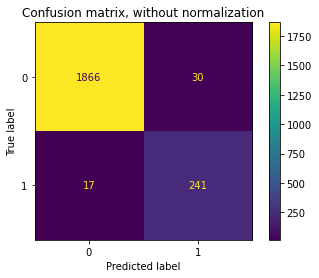

True Negatives:  1866
False Positives:  30
False Negatives:  17
True Positives:  241


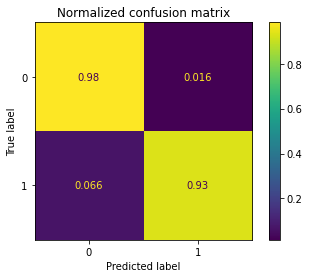

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


True Negatives:  0.9841772151898734
False Positives:  0.015822784810126583
False Negatives:  0.06589147286821706
True Positives:  0.9341085271317829
----------------------------------------------------------------------------------------------------------------
Precision Recall Curve


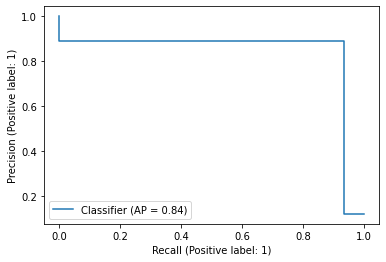

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------------------------------------------------------------------------------------
ROC Curve


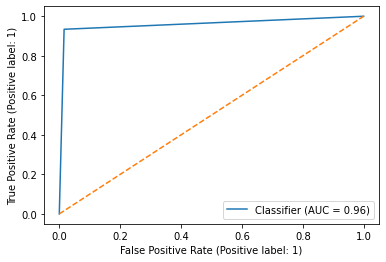

In [31]:
startTime = time.time()
NBpreds = NB.predict(X_test)
endTime = time.time()
print(f'Prediction time: {endTime - startTime}s\n')
printMetrics(y_test, NBpreds)
plotMetrics(y_test, NBpreds)

## Results

Accuracy:
	LR (0.978) vs Modified LR (0.98)
		- Increase accuracy possibly due to learning rate adjustment to diff words, allowing for different words to have different importance. 
			example, if u see the word "The" multiple times, it likely has less importance
			if u see a word for the first time, it likely has more importance. 

Time:
	LR (1119s) vs Modified LR (17s)
		- Matrix-Vector multiplcation became Vector-Vector Multiplication
		- Time complexity decreased from O(nFS) to O(nF) 

Decreased False Positive and False Negative:
	LR(8,38) vs Modified LR(6,36)
		- Differing learning rate for different words
		- Model is not as "overfitted" as compared to LR, since its exposure to data is substantially less

No early dropout in both:
	- Low learning rate leads to slower progress/movement along curve, thus prevent global minima from being found in 10k iterations
	- However, there is a tradeoff between more iterations to find the global minima. Time taken increases while accuracy only slightly increases
		- Law of Marginal Returns (like actually)
			- Consider a simple quadratic function, we are already nearing the global minima. Changes/Differences are slight

Comparison with Naive Bayes
- NB generally performed worse simpy due to the fact that it relies on probability and hyper-parameter tuning. 
	- Better hyperparameter tuning would lead to better results
	- NB probability itself is approximated with frequency counting as a means of time saving and computing efficiency 
	- Notable that is has less false negatives
		- NB works on frequency counting. False negatives largely decreased since there is no "global minima" needed, but simply a probability
		- NB itself includes the probability of the word appearing in documents, giving importance to words based on their frequency in documents
			- Similar concept to Modified LR, except it does this for the entire dataset, instead of just what the gradient descent has seen. 

	While ROC curve is the same, with the same Area under curve, a more accurate way of evaluation is through precision recall 
		(https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0118432)
	
	Precision Recall 
	- MLR reaches a recall of 87% with a precision of 97%
		- i.e, it can make better true positive calls, but also have increased chance of false positive
	- NB however reaches a recall of 91% with a precision of 85%

	We want a high recall (detect as many as possible) instead of high precision (rather have false positive than false negative)
	MLR achieves a higher recall and precision anyways. 


Overall however, it mirrors what is seen that given enough data, almost all classifiers reach similar accuracy, with the only difference being time. 
Here, NB performed the fastest, with Modified LR and LR behind respectively. 

In conclusion, Modified LR performs better 

Text(0.5, 1.0, 'ROC curve')

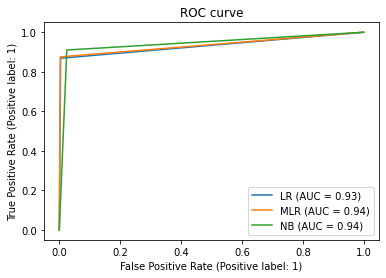

In [203]:
metrics.RocCurveDisplay.from_predictions(y_test, LRpreds, ax = plt.gca(),name = "LR")
metrics.RocCurveDisplay.from_predictions(y_test, MLRpreds, ax = plt.gca(),name = "MLR")
metrics.RocCurveDisplay.from_predictions(y_test, NBpreds, ax = plt.gca(),name = "NB")
plt.title('ROC curve')

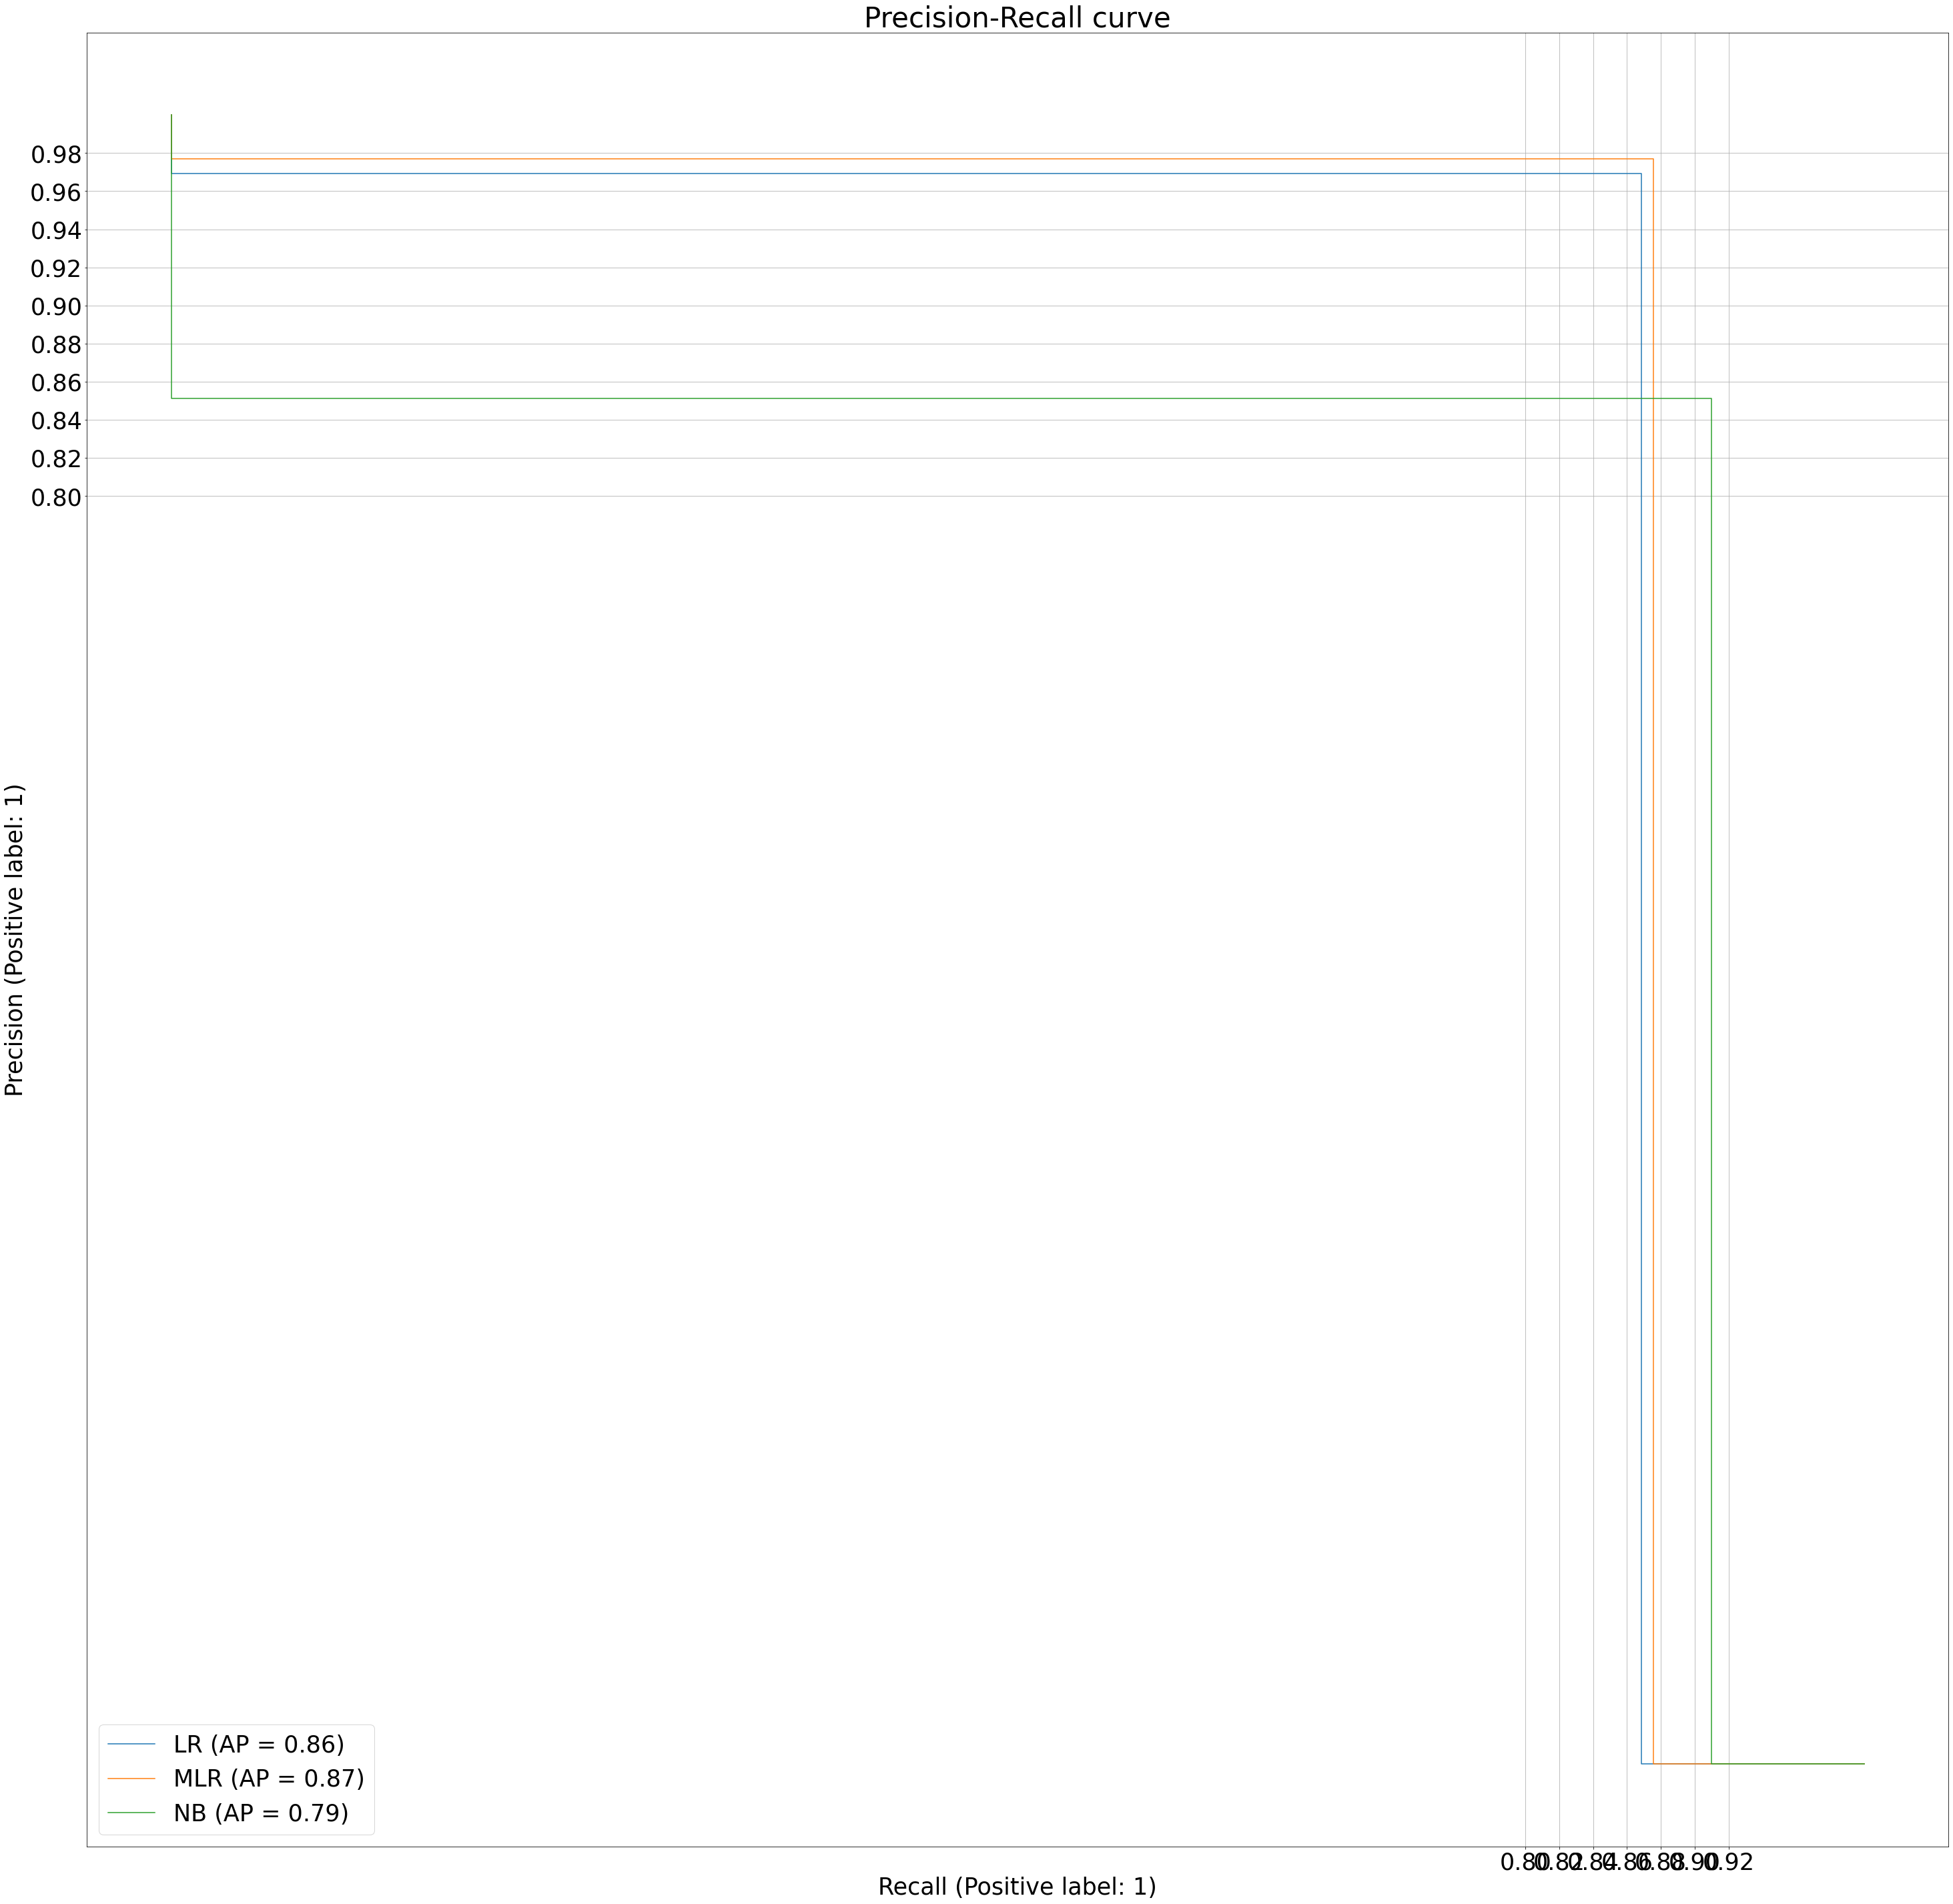

In [252]:
metrics.PrecisionRecallDisplay.from_predictions(y_test, LRpreds, ax = plt.gca(),name = "LR")
metrics.PrecisionRecallDisplay.from_predictions(y_test, MLRpreds, ax = plt.gca(),name = "MLR")
metrics.PrecisionRecallDisplay.from_predictions(y_test, NBpreds, ax = plt.gca(),name = "NB")
plt.grid()
#more precise axis with more ticks
plt.xticks(np.arange(0.8, 0.94, 0.02))
plt.yticks(np.arange(0.8, 1, 0.02))
plt.title('Precision-Recall curve')
#increase size of plot
plt.rcParams['figure.figsize'] = [50, 50]
#increase font size
plt.rcParams.update({'font.size': 35})